<center><h1> Artifical and Computational Intelligence Assignment 1 </h1></center>
 
Problem Solving by using A*

Weightage: 13%

Date of Posting - 09/Dec/2019

Deadline - 24/Dec/2019

__New Deadline - 12/Jan/2019__

Please Enter group and Individual information below:

Group ID/Number:__ACI_GROUP022__

Group Members BITS ID: __2018AH04563__ and __2018AH04509__

<h3>Things to Follow</h3>

1. Use appropriate data structures for the fringes and explain the reasoning behind the usage. You need not create data structures, instead use available libraries directly.

2. Avoid any hard-coding unless absolutely necessary.

3. Provide proper documentation

4. Read the question file provided carefully and attempt all the questions! 

Coding begins now!!!

1) Define the environment representation in the following code block

#Environment representation goes here
- Refer to the below classes for complete implementation of the finding the shortest path between two cities where a agent must move around in the environment to explore unknown territory.
- In the problem statement of the Assignment, search space is provied as a graph, where states associated with the search space are represented by graph nodes, and the transition between states is captured by graph edges. Generally, Graphs can represent different environments, such as road maps, games, and communication networks. In the assignment the graph is represented as road map between Indian cities.
- Environment is __fully observable__ as the complete state of the environment is available at each point in time. This is a __single agent__ environment.

Define the haversine formula and what it does

__#haversine formula representation__ 

Apart from the 3 trigonometric functions which every one is familiar with (i.e) with sine, cosine and, tangent. There are additional trigonometric functions which are versine, haversine, coversine, hacoversine, exsecant, and excosecant. 

All the additional trigonometric functions can be represented with simply in terms of more familiar trigonometric functions. For example, haversine(θ) = sin²(θ/2).

The __haversine formula__ is a very accurate way of computing distances between two points on the surface of a sphere using the latitude and longitude of the two points. The haversine formula is a re-formulation of the spherical law of cosines, but the formulation in terms of haversines is more useful for small angles and distances.

Haversine Formula:
haversine(θ) = sin²(θ/2)

In the above equation where θ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) is how it gets translated in the above formula to include latitude and longitude coordinates. Note that angles need to be in radians to pass to trigonometric functions:

a = sin²(θB - θA/2) + cos θA * cos θB * sin²(λB - λA/2)
c = 2 * atan2( √a, √(1−a) )
d = R ⋅ c

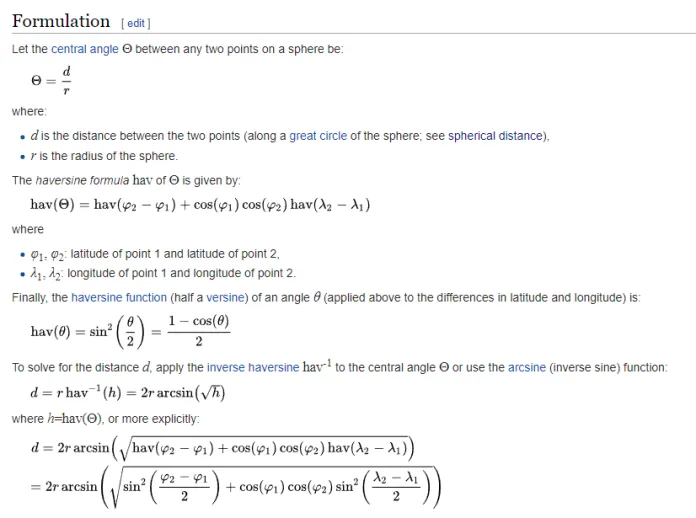

__Note: Above notes and images are taken from Wiki__

2) Define a function which calculates the heuristic distance from each city to the destination city in the following code block

- Refer to the below method implemenation with name <font color='blue'> __calculateHueristicValue__</font> at the CityOperations class.
- As mentioned above, we went thorough understanding of the __Haversine__ formula.

__Assumptions and Conditions.__

In [1]:
import csv,os
from math import radians, sin, cos, asin, acos, sqrt

In [2]:
#Code Block 2 ..
class City:
    def __init__(self, name, latitude, longitude):
        """ 
        Constructor. 
  
        Parameters: 
        arg1 (string): Name of the City        
        arg2 (decimal): Latitude of the City
        arg3 (decimal): Logitude of the City        
  
        Returns: 
        
        """
        self.Name = name
        self.HeuristicDistance = 0
        self.Latitude = latitude
        self.Longitude = longitude
        self.AdjacentCities = []
        self.FofN = 0
        

class AdjacentCity:
    def __init__(self, name, distance):
        """ 
        Constructor. 
  
        Parameters: 
        arg1 (string): Name of the City        
        arg2 (string): Distance between the Adjacent City        
  
        Returns: 
        
        """
        self.Name = name
        self.Distance = distance
        self.HeuristicDistance = 0
        self.IsVisited = False

class CityOperations:
    def __init__(self):
        """ 
        Constructor. 
  
        Parameters: 
  
        Returns: 
        
        """
        self.Cities = []
        self.Radius = 6371
        self.Path = []
        self.VisitedNodeCount = []
        self.PathCost = 0
        
        
    def initializeCityDetails(self):
        """This function would create cities and their dependencies

        Args: No arguments
            
        Returns: Void
            
        """
        #Reading the cities and adjicentcities infromation from file rather to avoid hadcoding.
        
        directoryPath = os.getcwd()
        filePath = directoryPath + '\\' + 'CityInfomation.csv'
        with open(filePath) as f:
            citiInfo=[tuple(line) for line in csv.reader(f)]
        
        for item in citiInfo:
            citiesList = list(item)  
            if len(citiesList) >= 2 :
                newCity = City(citiesList[0],float(citiesList[1]),float(citiesList[2])) 
        
            for i in range(3, len(citiesList)):
                if len(citiesList[i])>0:
                    adjCityList=citiesList[i].split('/') 
                    adjicentCity = AdjacentCity(adjCityList[0],int(adjCityList[1]))
                    newCity.AdjacentCities.append(adjicentCity)
            self.Cities.append(newCity)      
        
        
            # Have the Heuristic Distance Value for all Cities apart from Chennai City
            for city in self.Cities:                            
                self.calculateHueristicValue(city, self.Cities[-1])

            # Have the Heuristic Distance Value for all Adjacent Cities for a city
            for city in self.Cities:                
                for adjCity in city.AdjacentCities:
                    adjCity.HeuristicDistance = self.getHeuristicValue(adjCity.Name)
    
    def calculateHueristicValue(self, sourceCity, desitinationCity):
        """This function would calculate the distance between two citied when latitude and longitudes of 
        both cities are provided

        Args:
            arg1 (city): Source City.
            arg2 (city): Destination City.

        Returns: Void
            #int: The return value. rounded of the integer value of the distance of the cities.
        """
        temp1_latitude, temp1_longitude, temp2_latitude, temp2_longitude = map(radians, [sourceCity.Latitude, sourceCity.Longitude, desitinationCity.Latitude, desitinationCity.Longitude])

        # rounding is needed as we might get a distance say 384.709 so we need to round it nearest integer value.
        sourceCity.HeuristicDistance = round(abs( self.Radius * (
            acos(sin(temp1_latitude) * sin(temp2_latitude) + 
                 cos(temp1_latitude) * cos(temp2_latitude) * cos(temp1_longitude - temp2_longitude))
        )))
        
    def getHeuristicValue(self, cityName):
        """This function would return Heuristic Distance for a city

        Args:
            arg1 (name): Name of the City.

        Returns: 
            int: Heuristic Distance Value.
        """
        for city in self.Cities:
            if city.Name == cityName:
                return city.HeuristicDistance
        
    def displayHeuristicValues(self):
        """This is helper function to show the Hueristic Values of each city

        Args:
            
        Returns: Void 
            
        """
        print("########## Heuristic Values ##########") 
        for city in self.Cities:
            print('\n')
            valueToPrint = 'City Name: ' + city.Name + ' <-----> Its Heuristic Value: ' + str(city.HeuristicDistance)
            print(valueToPrint)
            for adjCity in city.AdjacentCities:
                valueToPrint = '\tAdj. City Name: ' + adjCity.Name + ' <-----> Its Distance to ' + city.Name + ': ' + str(adjCity.Distance) + ' <-----> Its Heuristic Value: ' + str(adjCity.HeuristicDistance)
                print(valueToPrint)
        print("########## Done Heuristic Values ##########\n")
    
    def displayPath(self):
        """This is helper function to show Path taken to reach destination from Panaji

        Args:
            
        Returns: Void 
            
        """
        # While adding the path it was from goal city to adj cities to initial city,
        # so we need to reverse the path
        self.Path.reverse()
        printingValue = 'Path taken to reach destination (' + self.Path[-1] +') ' + 'from source (' + self.Path[0] +'):\n'
        print(printingValue)
        
        path = '['
        for p in self.Path:
            path = path + p + '-->'
        if len(path) > 1:
            path = path[:-3]
            
        path = path + ']'
        print(path)

    def displayVistiedNodesWithCount(self):
        """This is helper function to show total visited nodes

        Args:
            
        Returns: Void 
            
        """

        tempList = set(self.VisitedNodeCount)

        
        print('Total Number of nodes vistied to get this state:', str(len(tempList)))
    
    def displayPathCost(self):
        """This is helper function to show Cost of the path

        Args:

        Returns: Void 

        """
        print('Cost of the path is:\t', str(self.PathCost))
    
    def getCity(self, cityName):
        """This function to will return City when city name is provided

        Args:
        arg1 (string): Name of the City

        Returns: 
        City object

        """
        for city in self.Cities:
            if city.Name == cityName:
                return city
        return None
        
    def findShortestPathUsingAStar(self, startCityName, goalCityName):
        """This function is the A* implementation for finding shortest path between two nodes (cities)

        Args:
        arg1 (string): Name of the Start City (Initial City)        
        arg2 (string): Name of the Destination City (Goal City)

        Returns: 
        City object

        """
        startCity = self.getCity(startCityName)        
        goalCity = self.getCity(goalCityName)
        
        if (not (startCity is None)) and (not (goalCity is None)):
            # openCityList is a list of nodes(cities) which have been visited.
            openCityList = set([startCity])
            
            # closeCityList is a list of nodes(cities) which have been visited
            closeCityList = set([])
            
            # g_Of_N contains current distances from startCity to all other cities
            g_Of_N = {}
            
            # the g_Of_N for the start city would be ZERO
            g_Of_N[startCity.Name] = 0
            
            # parents contains an adjacency relationship with all the cities
            parents = {}
            parents[startCity.Name] = startCity
            
            while len(openCityList) > 0:
                currentCity = None
                # find a city with the lowest value of f_Of_N()
                for olCity in openCityList:
                    if currentCity == None or g_Of_N[olCity.Name] + olCity.HeuristicDistance < g_Of_N[currentCity.Name] + currentCity.HeuristicDistance:
                        currentCity = olCity;
                        self.PathCost = g_Of_N[olCity.Name]
                        self.VisitedNodeCount.append(currentCity.Name)
                        
                if currentCity == None:
                    print('Desired path cannot be found :-(')
                    return None
                
                # if the current city is the goal city
                # then create the path from goal city to start city
                if currentCity.Name == goalCity.Name:
                    while parents[currentCity.Name].Name != currentCity.Name:
                        self.Path.append(currentCity.Name)
                        currentCity = parents[currentCity.Name]
                    
                    
                    self.Path.append(startCity.Name)
                    return 'Hurray! Path finding done!!!'
                
                # for all adjacent cities of the current city
                for adjCity in currentCity.AdjacentCities:
                    # Check if its not in the openCityList and closedCityList
                    if ((not (any(x.Name == adjCity.Name for x in openCityList))) and (not (any(x.Name == adjCity.Name for x in closeCityList)))):
                        openCityList.add(self.getCity(adjCity.Name))
                        parents[adjCity.Name] = currentCity
                        g_Of_N[adjCity.Name] = g_Of_N[currentCity.Name] + adjCity.Distance
                    # any quicker way? Check now
                    else:
                        if g_Of_N[adjCity.Name] > g_Of_N[currentCity.Name] + adjCity.Distance:
                            g_Of_N[adjCity.Name] = g_Of_N[currentCity.Name] + adjCity.Distance
                            parents[adjCity.Name] = currentCity
                            
                            if any(x.Name == adjCity.Name for x in closeCityList):
                                closeCityList.remove(adjCity)
                                openCityList.add(self.getCity(adjCity.Name))
                
                # remove current city from the openCityList and add to closedCityList
                # this step is must as we have already analyzed the adjacent cities of the current city
                openCityList.remove(currentCity)
                closeCityList.add(self.getCity(currentCity.Name))
            
            
            print('Desired path cannot be found :-(')
            return -1                  


3) Implementation of A* Algorithm . Feel free to add code blocks for each methods needed starting here.
Please modularize the implementation of A* and write each of them in a code block. 

#Code Block 1

- Refer to the above method implemenation with name <font color='blue'> __findShortestPathUsingAStar__</font> at the CityOperations class.
- We have implemented the above code after thorough undersanding by following the book, __A First Course in ARTIFICIAL INTELLIGENCE__ by __IIT Madras Prof. Deepak Khemani__. In the book he has mentioned about the how to proceed with A* Algorithm (only psuedo code).    

Call your main function/algorithm block in the next code block with appropriate input representation

In [3]:
#Computation call
cityOperations = CityOperations()
cityOperations.initializeCityDetails()

# Below is just an helper function, just to know about the heuristic values of each city.
cityOperations.displayHeuristicValues()

########## Heuristic Values ##########


City Name: Panaji <-----> Its Heuristic Value: 744
	Adj. City Name: Raichur <-----> Its Distance to Panaji: 457 <-----> Its Heuristic Value: 469
	Adj. City Name: Mangalore <-----> Its Distance to Panaji: 367 <-----> Its Heuristic Value: 587
	Adj. City Name: Bellari <-----> Its Distance to Panaji: 409 <-----> Its Heuristic Value: 427


City Name: Raichur <-----> Its Heuristic Value: 469
	Adj. City Name: Panaji <-----> Its Distance to Raichur: 457 <-----> Its Heuristic Value: 744
	Adj. City Name: Tirupati <-----> Its Distance to Raichur: 453 <-----> Its Heuristic Value: 110
	Adj. City Name: Kurnool <-----> Its Distance to Raichur: 100 <-----> Its Heuristic Value: 389


City Name: Mangalore <-----> Its Heuristic Value: 587
	Adj. City Name: Panaji <-----> Its Distance to Mangalore: 365 <-----> Its Heuristic Value: 744
	Adj. City Name: Kozhikode <-----> Its Distance to Mangalore: 233 <-----> Its Heuristic Value: 529
	Adj. City Name: Bangalore <----->

In [4]:
# findShortestPathUsingAStar expects start city and goal city. 
# if any of it is not present then it will not executed. 
cityOperations.findShortestPathUsingAStar('Panaji', 'Chennai')

'Hurray! Path finding done!!!'

The agent should provide expected output for questions mentioned below in the subsequent blocks

(3.1) Path taken to reach destination from Panaji

In [5]:
# Execute statement to retrieve the path taken here
cityOperations.displayPath()

Path taken to reach destination (Chennai) from source (Panaji):

[Panaji-->Bellari-->Tirupati-->Chennai]


(3.2) Cost of the path

In [6]:
# Execute statement to retrieve the cost of the path here
cityOperations.displayPathCost()

Cost of the path is:	 941


(3.3) Total Number of nodes vistied to get this state

In [7]:
# Execute statement to retrieve the total number of nodes visited to get this state here
cityOperations.displayVistiedNodesWithCount()

Total Number of nodes vistied to get this state: 7


<center>All the best!! Happy Coding!!Let human intelligence prevail</center>
<center>**********************************************************</center>

<h3>Conclusions:</h3>

- By this assignment we have understood the how to calculate two location on the Earth by using Haversine formula

- For this assignment, inorder to have complete understanding on Haversine formula we interacted with Prof. YVK Ravi (our Probability & Statistics). His explanation and exploration of it at Web, led to appropriate implementation of the Haverine formula

- In order to understand and implement the A* alogrithm rightly, we went about exploring & understanding of Branch and Bound (B & B) & Dijkstra algorithm

- We had a followed with Prof. Deepak Khemani (IIT Prof on AI) for A* algorithm implementation